In [171]:
import vk
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from numpy import *
from pandas import *
from seaborn import *
from collections import Counter
from matplotlib import pylab
from pylab import *
from ChernoffFace import *

In [172]:
access_t='vk1.a.I_2IStvCV2RmOjhYZPGpG5i2J4w29fqywAtnUg49tsTt830Ya-u6DI1m6yF1eW21UsNqdjaBf1WgSzrrRjJUw6SFK7cDVW53E7LqaoUlFyDS6FY6yTydk_hLDI2PLYUjILu2YvfMobFxNt8jsGCfLuuPBIMNtqPAKastcy_anZV4dIf9yBKc0czUePaLYESOicYCfk2a40bQAzQ9nReV0g'
vk_api=vk.API(access_token=access_t)

In [173]:
userLeaderList = [67323233, 417439506, 72525096, 37310136, 82928435, 337140314, 234030319, 273203481, 414820807, 466392242]
userFields = ["bdate","city","country","sex", "followers_count", "has_photo", "last_seen", "online", "relation"]
users = vk_api.users.get(user_ids=userLeaderList,fields=userFields, v=5.131)
users[0]

{'id': 67323233,
 'bdate': '8.5.1975',
 'city': {'id': 12269, 'title': 'Вельск'},
 'country': {'id': 1, 'title': 'Россия'},
 'has_photo': 1,
 'last_seen': {'platform': 7, 'time': 1672149645},
 'followers_count': 439,
 'relation': 4,
 'relation_partner': {'id': 55923235,
  'first_name': 'Андрей',
  'last_name': 'Белых'},
 'sex': 1,
 'online': 0,
 'first_name': 'Валентина',
 'last_name': 'Иванова',
 'can_access_closed': True,
 'is_closed': False}

In [174]:
friendlistsList = []
for i in users:
    listToChange = ['city', 'country']
    for ii in listToChange:
        try:
            i[f'{ii}'] = i[f'{ii}']['title']
        except:
            i[f'{ii}'] = "NaN"

    try:
        i['last_seen'] = i['last_seen']['time']
    except:
        i[f'last_seen'] = "0"
    
    try:
        i['relation_partner'] = i['relation_partner']['id']
    except:
        i[f'relation_partner'] = "NaN"
    
    
    try:
        friendlistsList.append(vk_api.friends.get(user_id=i['id'], v=5.131)['items'])
    except:
        friendlistsList.append("NaN")


In [175]:
df_raw = DataFrame(data=users)

In [176]:
countFriendsList = []
for i in friendlistsList:
    if i == "NaN":
        countFriendsList.append(0)
    else:
        countFriendsList.append(len(i))
countFriendsList

[5000, 5000, 5000, 1076, 5000, 837, 5000, 0, 0, 0]

In [210]:

df = df_raw.assign(FriendsCount=countFriendsList)
df


,id,bdate,city,country,has_photo,last_seen,followers_count,relation,relation_partner,sex,online,first_name,last_name,can_access_closed,is_closed,online_mobile,online_app,FriendsCount
0,67323233,8.5.1975,Вельск,Россия,1,1672149645,439.0,4.0,55923235,1,0,Валентина,Иванова,True,False,NaN,NaN,5000
1,417439506,NaN,Вельск,Россия,1,1672067811,2.0,0.0,NaN,2,0,Вельский-Краеведческий,Музей,True,False,NaN,NaN,5000
2,72525096,14.4.1978,Вельск,Россия,1,1672150239,352.0,NaN,NaN,1,1,Марина,Петрова,True,False,NaN,NaN,5000
3,37310136,5.1.1989,Вельск,Россия,1,1672149592,701.0,4.0,NaN,1,0,Евгения,Арбузова,True,False,NaN,NaN,1076
4,82928435,1.8,Вельск,Россия,1,1672150270,936.0,NaN,NaN,1,1,Ирина,Власова,True,False,1.0,2274003.0,5000
5,337140314,NaN,Вельск,Россия,1,1672147719,205.0,0.0,NaN,1,0,Наталья,Тюрюханова,True,False,NaN,NaN,837
6,234030319,8.12,NaN,Россия,1,1672130886,298.0,NaN,NaN,1,0,Анна,Мастерская,True,False,NaN,NaN,5000
7,273203481,NaN,NaN,Россия,1,1672147535,NaN,NaN,NaN,1,0,Светлана,Овсянкина,False,True,NaN,NaN,0
8,414820807,NaN,Вельск,Россия,1,1672148966,2.0,0.0,NaN,1,0,Наталия,Шалагина,True,False,NaN,NaN,0
9,466392242,NaN,NaN,NaN,1,1672150295,NaN,NaN,NaN,1,1,Лизавета,Красота,False,True,1.0,3140623.0,0


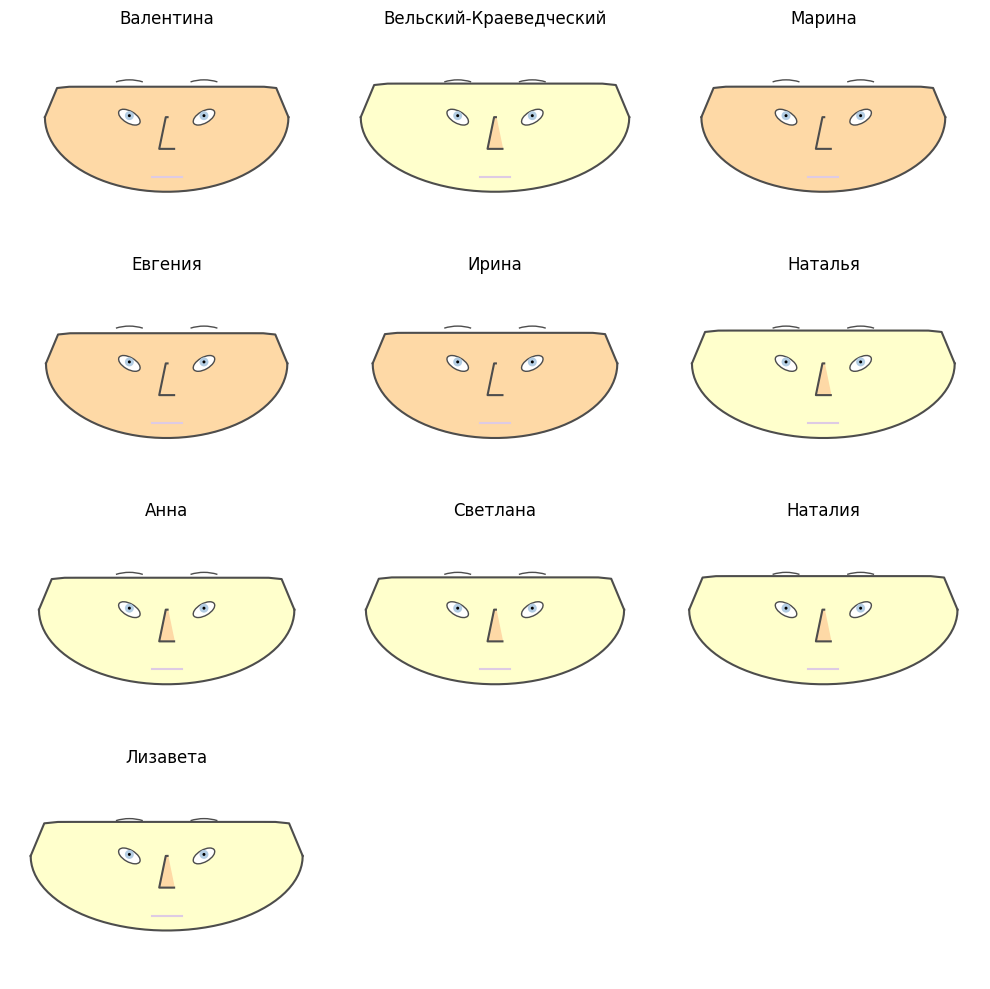

In [211]:
df2 = df[['id', 'first_name', 'bdate', 'city','last_seen','sex','online','is_closed','can_access_closed','FriendsCount']]
to_numeric(df2['FriendsCount'])
to_numeric(df2['sex'])
to_numeric(df2['online'])
to_numeric(df2['last_seen'])

fig = chernoff_face(data=df2, 
                    titles=df["first_name"].to_list(), 
                    n_columns=3,
                    long_face=False,
                    figsize=(10, 10),
                    color_mapper=matplotlib.cm.Pastel1,
                    dpi=100)

# Display
fig.tight_layout()
plt.show()

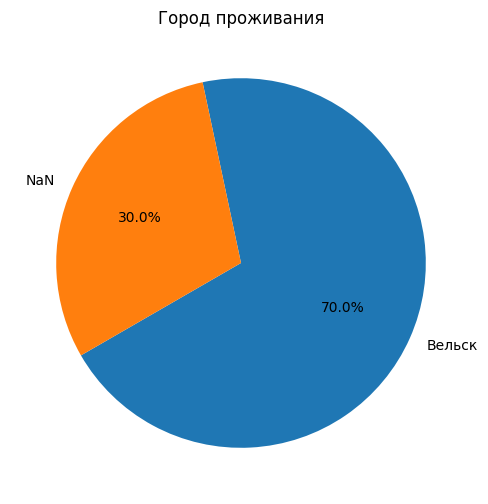

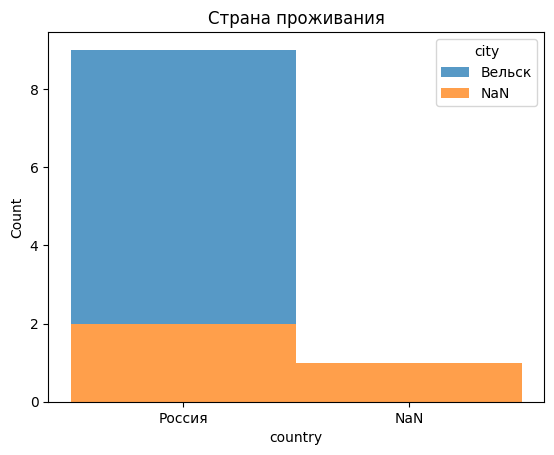

In [216]:
#Круговая
#Данные
data = Counter(df['city'])
labels = data.keys()
sizes = data.values()

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=210)
plt.title('Город проживания')
plt.show()

histplot(df, 
        x="country", 
        multiple="stack", 
        hue="city", 
        discrete=True,
        linewidth=0)
plt.title('Страна проживания')
plt.show()

In [212]:
df.to_csv('data.csv')